In [99]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

In [100]:
df = pd.read_csv("in/ee.txt", sep="\s+",skiprows=11, header=None, decimal=",")
df = df.drop(range(257,len(df)))

In [101]:
df = df.drop(df.iloc[:, 5:20],axis = 1)
df.columns = ["mm:ss", "obciazenie", "VO2", "VO2/kg", "VCO2"]

In [102]:
def get_sec(string):
    m, s = string.split(':')
    return (60*int(m) + int(s))
df["time"] = df["mm:ss"].apply(get_sec)

In [103]:
#nazwy do zmiany + ang

# df2 = df.drop(df.iloc[3:]).copy()

df.drop(df.iloc[0:3].index, inplace = True)

df_spoczynek = df.iloc[3:41].copy() #ten slice do zmiany, bo trzeba sprawdzic w ktorym dokladnie momencie nastapila zmiana ruchu
df_machanie = df.iloc[41:86].copy() # tak samo jak wyzej
df_jazda = df.iloc[86:200].copy()
df_luzne = df.iloc[200:len(df)].copy()

# df_array = [df, df_spoczynek, df_machanie, df_jazda, df_luzne]
df_array = [df]

for dataframe in df_array:
    dataframe.reset_index(inplace=True, drop=True)

In [104]:
# def delta_t(time):
#     df["delta_t"][0] = 0
#     for i in range(1, len(df)):
        # df["delta_t"][i] = df["time"][i+1] - df["time"][i]
def dt(time):
    deltat = []
    deltat.append(0)
    for i in range(0, len(time)-1):
        deltat.append( time[i+1] - time[i] )
    return deltat

# def 

In [105]:
for dataframe in df_array:
    dataframe["delta_t in min"] = dt(dataframe["time"])
    dataframe["delta_t in min"] = dataframe["delta_t in min"]/60
    dataframe["whole V02 in specified time"] = dataframe["VO2"]*dataframe["delta_t in min"]
    dataframe["whole VC02 in specified time"] = dataframe["VCO2"]*dataframe["delta_t in min"]



In [106]:

# df["time"].iloc[3:200] = df["time"].iloc[3:200] + df["time"].iloc[2]

df["time"].iloc[197:] = df["time"].iloc[197:] + df["time"].iloc[196]

df.drop(197, inplace = True)
df.reset_index(inplace=True, drop=True)
# for i in range(0, len(df)-1):
    # if df["time"][i+1] == df["time"][i]:
        # df.drop(i+1)

# df["min"] = df["time"]/60
# df["whole V02"] = df["VO2"]*df["min"]

/tmp/ipykernel_15744/951125739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"].iloc[197:] = df["time"].iloc[197:] + df["time"].iloc[196]


In [107]:
print(df.to_string())

     mm:ss  obciazenie   VO2  VO2/kg  VCO2  time  delta_t in min  whole V02 in specified time  whole VC02 in specified time
0     0:00           0  0.22     3.9  0.19     0        0.000000                     0.000000                      0.000000
1     0:04           0  0.27     4.8  0.23     4        0.066667                     0.018000                      0.015333
2     0:09           0  0.25     4.4  0.21     9        0.083333                     0.020833                      0.017500
3     0:13           0  0.26     4.5  0.22    13        0.066667                     0.017333                      0.014667
4     0:17           0  0.25     4.4  0.21    17        0.066667                     0.016667                      0.014000
5     0:22           0  0.22     3.9  0.19    22        0.083333                     0.018333                      0.015833
6     0:27           0  0.26     4.5  0.21    27        0.083333                     0.021667                      0.017500
7     0:

In [108]:
tp_spoczynek = df["time"][0]
tk_spoczyhek = df["time"][39]

lewa = 551
prawa = 719

O2_spoczynek = df["whole V02 in specified time"][0:39].sum()
Co2_spoczynek = df["whole VC02 in specified time"][0:39].sum()

caleO2 = 0
caleCO2 = 0
for i in range(141,210):
    caleO2 += df["whole V02 in specified time"][i]
    caleCO2 += df["whole VC02 in specified time"][i]

print(caleO2)
print(caleCO2)

srednieO2 = caleO2/(prawa-lewa) # na sekunde
srednieCO2 = caleCO2/(prawa-lewa) # na sekunde

spoczynek_srednieO2 = O2_spoczynek/(tk_spoczyhek-tp_spoczynek)
spoczynek_srednieCO2 = Co2_spoczynek/(tk_spoczyhek-tp_spoczynek)

spoczynek_srednieO2min = spoczynek_srednieO2*60
spoczynek_srednieCO2min = spoczynek_srednieCO2*60

stosunek_spoczynek = spoczynek_srednieCO2/spoczynek_srednieO2

srednieO2min = srednieO2*60
srednieCO2min = srednieCO2*60
print("srednie zuzycie tlenu 02 [l/min] = ", srednieO2min)
print("srednie zuzycie tlenu C02 [l/min] = ", srednieCO2min)

stosunek = srednieCO2/srednieO2
print(stosunek)

print("srednie zuzycie tlenu 02 [l/min] w spoczynku = ", spoczynek_srednieO2min)
print("srednie zuzycie tlenu C02 [l/min] w spoczynku = ", spoczynek_srednieCO2min)

print("stosunek spoczynku = ", stosunek_spoczynek)

roznica_sredniego02min = srednieO2min - spoczynek_srednieO2min
print("roznica sredniego zuzycia tlenu 02 [l/min] = ", roznica_sredniego02min)

zuzyte02_wysilku = roznica_sredniego02min*(prawa-lewa)/60
czas_wysilku = (prawa-lewa)/60/60 # w godzinach
print("zuzyte tlenu 02 [l] = ", zuzyte02_wysilku)

liczba_moli = zuzyte02_wysilku/22.4
print("liczba moli tlenu 02 = ", liczba_moli)
energia_wysilku = liczba_moli*113 # bo w obu przypadkach mamy spalanie glukozy
print("energia wysilku [kcal] = ", energia_wysilku)
print("energia wysilku [kJ] = ", energia_wysilku*4.184)
masa = 57 # kg
met = energia_wysilku/czas_wysilku/masa
print("met = ", met)


3.469499999999999
3.791666666666667
srednie zuzycie tlenu 02 [l/min] =  1.2391071428571425
srednie zuzycie tlenu C02 [l/min] =  1.354166666666667
1.0928567997309895
srednie zuzycie tlenu 02 [l/min] w spoczynku =  0.24189944134078212
srednie zuzycie tlenu C02 [l/min] w spoczynku =  0.2095530726256984
stosunek spoczynku =  0.8662817551963052
roznica sredniego zuzycia tlenu 02 [l/min] =  0.9972077015163604
zuzyte tlenu 02 [l] =  2.792181564245809
liczba moli tlenu 02 =  0.12465096268954505
energia wysilku [kcal] =  14.085558783918591
energia wysilku [kJ] =  58.93397795191539
met =  5.2953228510972155


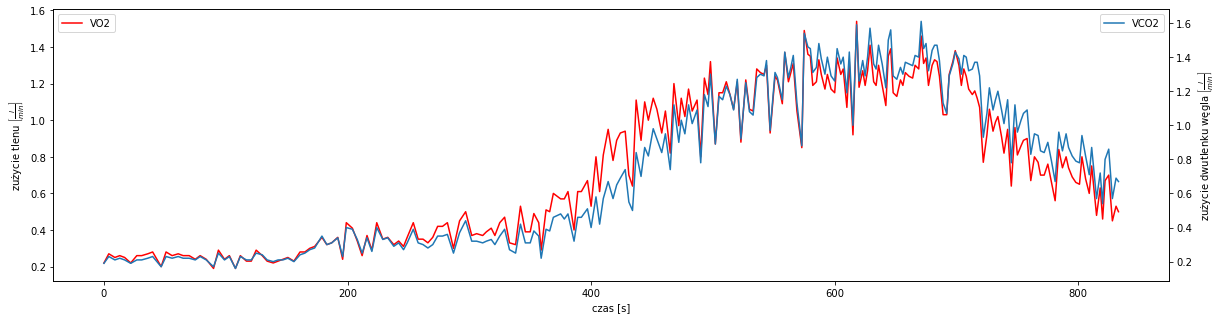

In [127]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(df["time"], df["VO2"], label="VO2", color = "red")

# ax.plot(df["time"], df["whole V02"], label="VO2")
# ax.plot(df["time"], df["VCO2"], label="VCO2")
# ax.plot([lewa,prawa],[srednieO2min,srednieO2min])
# ax.plot([tp_spoczynek,tk_spoczyhek],[spoczynek_srednieO2min,spoczynek_srednieO2min])

#dwie osie pionowe dla V02 i VCO2

# ax.vlines(x=[tp_spoczynek,tk_spoczyhek], ymin=0, ymax=df["VO2"].max(), color="purple", linestyle="--")
# ax.vlines(x=[lewa,prawa], ymin=0, ymax=df["VO2"].max(), color="red", linestyle="--")

ax2 = ax.twinx()

ax2.plot(df["time"], df["VCO2"], label="VCO2")

ax.set_xlabel("czas [s]")
ax.set_ylabel(r"zużycie tlenu $\left [\frac{l}{min} \right ]$")
ax2.set_ylabel(r"zużycie dwutlenku węgla $\left [\frac{l}{min} \right ]$")

# fig.legend()
ax.legend(loc="upper left")
ax2.legend(loc="upper right")

fig.savefig("out/plot.jpg", dpi = 1200)
plt.show()

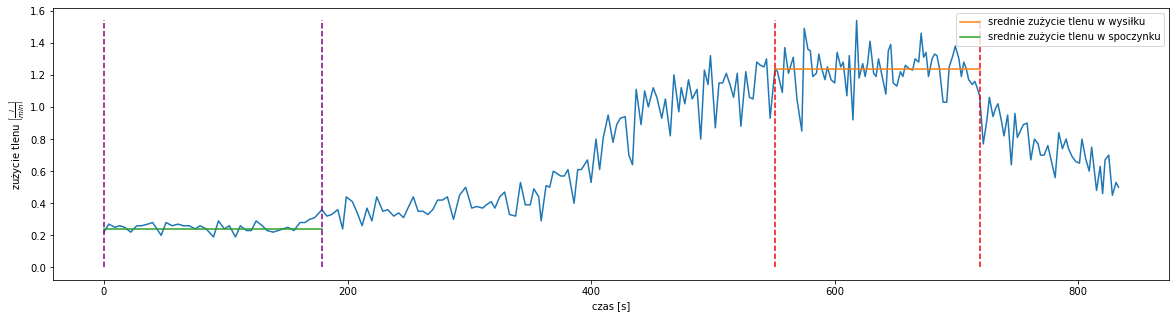

In [110]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(df["time"], df["VO2"])
# ax.plot(df["time"], df["whole V02"], label="VO2")
# ax.plot(df["time"], df["VCO2"], label="VCO2")
ax.plot([lewa,prawa],[srednieO2min,srednieO2min], label = "srednie zużycie tlenu w wysiłku")
ax.plot([tp_spoczynek,tk_spoczyhek],[spoczynek_srednieO2min,spoczynek_srednieO2min], label = "srednie zużycie tlenu w spoczynku")


ax.set_xlabel("czas [s]")
ax.set_ylabel(r"zużycie tlenu $\left [\frac{l}{min} \right ]$")

ax.vlines(x=[tp_spoczynek,tk_spoczyhek], ymin=0, ymax=df["VO2"].max(), color="purple", linestyle="--")
ax.vlines(x=[lewa,prawa], ymin=0, ymax=df["VO2"].max(), color="red", linestyle="--")

plt.legend()

fig.savefig("out/plotO2.jpg", dpi = 1200)

plt.show()

In [111]:
tp_wysilek = df["time"][df["obciazenie"] == 87].min()
tk_wysilek = df["time"][df["obciazenie"] == 87].max()

tk_spocz_index = df[df["time"] == tk_spoczyhek].index.values[0]
tp_wysilek_index = df[df["time"] == tp_wysilek].index.values[0]
tk_wysilek_index = df[df["time"] == tk_wysilek].index.values[0]

determining how much water could we boil from 20 to 100 degrees Celsius

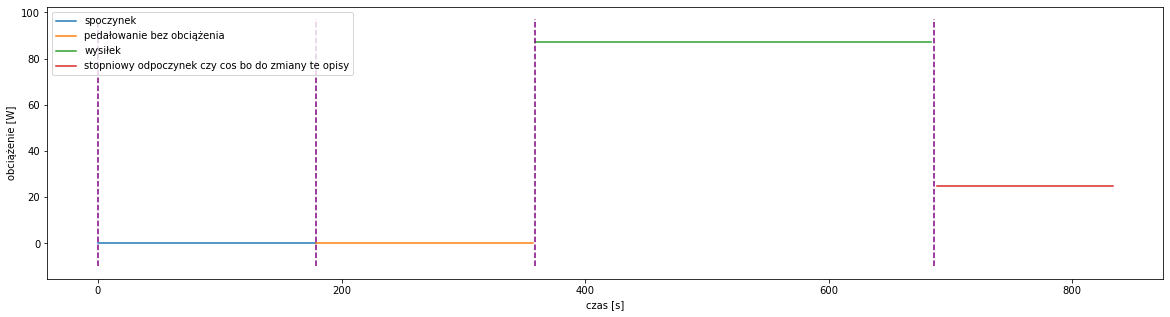

In [112]:
# wykres obciazenia
fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(df["time"][0:tk_spocz_index+1], df["obciazenie"][0:tk_spocz_index+1], label = "spoczynek")
ax.plot(df["time"][tk_spocz_index:tp_wysilek_index], df["obciazenie"][tk_spocz_index:tp_wysilek_index], label = "pedałowanie bez obciążenia")
ax.plot(df["time"][tp_wysilek_index:tk_wysilek_index], df["obciazenie"][tp_wysilek_index:tk_wysilek_index], label = "wysiłek")
ax.plot(df["time"][1+tk_wysilek_index:], df["obciazenie"][1+tk_wysilek_index:], label="stopniowy odpoczynek czy cos bo do zmiany te opisy")

ax.vlines(x=[tp_spoczynek,tk_spoczyhek, tp_wysilek, tk_wysilek], ymin=-10, ymax=df["obciazenie"].max()+10, color="purple", linestyle="--")

ax.set_xlabel("czas [s]")
ax.set_ylabel("obciążenie [W]")

plt.legend()
fig.savefig("out/load.jpg", dpi = 1200)
plt.show()

In [113]:
energy = energia_wysilku * 1000 #in jules
shc_water = 4189.9 # specific heat capacity of water in normal conditions
Tmax = 100 # celsius
Tmin = 20 # celsius

mass_of_water = energy/(shc_water*(Tmax-Tmin))
print("mass of water [kg] = ", mass_of_water)

mass of water [kg] =  0.04202235967421237
